In [38]:
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv("F:/Education/DS_Roadmap/ml/7_logistic_reg/Exercise/HR_comma_sep.csv")

In [40]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(columns=["left"])

In [45]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [46]:
y = df.left

In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3)

In [49]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
139,0.73,0.87,5,257,5,0,0,IT,low
5757,0.37,0.52,4,211,4,0,0,hr,low
780,0.44,0.65,3,271,4,0,0,sales,low
12483,0.42,0.54,2,143,3,1,0,sales,low
10110,0.92,0.90,4,179,3,0,0,hr,low


In [21]:
print("Ration of the worker who left in the train:", y_train.sum()/y_train.count())

Ration of the worker who left in the train: 0.24082408240824082


In [53]:
y_train.count()

9999

In [54]:
print("Ration of the worker who left in the test:", y_test.sum()/y_test.count())

Ration of the worker who left in the test: 0.239


In [55]:
print("Accuracy:", 1-y_test.sum()/y_test.size)

Accuracy: 0.761


<AxesSubplot:xlabel='salary', ylabel='left'>

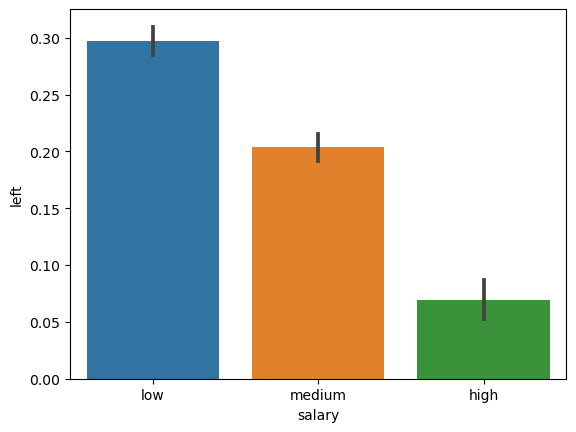

In [56]:
sns.barplot(x= X_train.salary, y= y_train)

In [57]:
salary_encoder = { "low":0, "medium":1, "high":2}

In [58]:
X_train["salary"] = X_train.salary.map(salary_encoder)

In [59]:
X_train.salary

139      0
5757     0
780      0
12483    0
10110    0
        ..
4285     1
2524     1
5998     0
6038     1
365      0
Name: salary, Length: 9999, dtype: int64

In [60]:
X_test["salary"] = X_test.salary.map(salary_encoder)

In [61]:
X_test["salary"]

11639    1
13028    1
6603     2
9293     1
1373     0
        ..
1006     1
11044    0
2220     1
9636     0
12929    1
Name: salary, Length: 5000, dtype: int64

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [63]:
dept_encoder  = OneHotEncoder(handle_unknown='ignore')
dept_encoder.fit_transform(X_train[["Department"]])
dept_encoder.transform(X_test[['Department']])

<5000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [64]:
left = df[df.left ==1]

In [65]:
left.shape

(3571, 10)

In [66]:
retained  = df[df.left !=1]
retained.shape

(11428, 10)

In [70]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

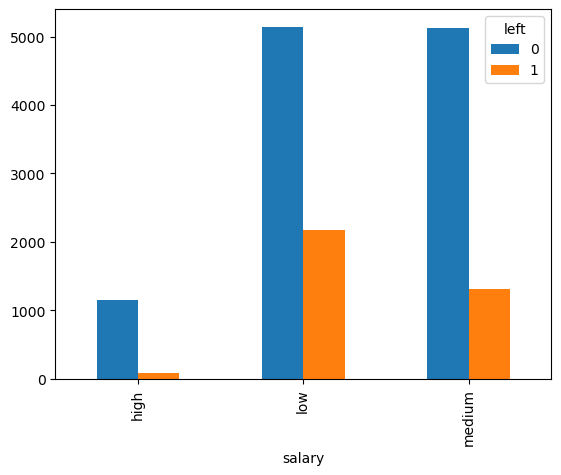

In [73]:
pd.crosstab(df.salary, df.left).plot(kind="bar")

<AxesSubplot:xlabel='Department'>

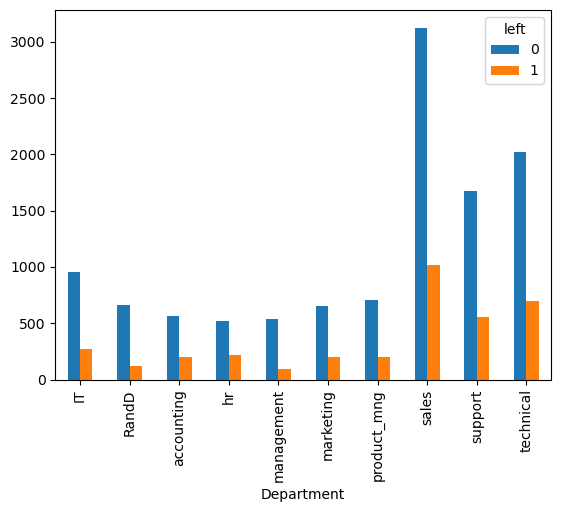

In [75]:
pd.crosstab(df.Department, df.left).plot(kind="bar")

In [76]:
new_df = df[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary" ]]

In [77]:
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [78]:
dummies = pd.get_dummies(df.salary)

In [79]:
dummies


,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [85]:
merged = pd.concat([new_df,dummies], axis=1)

In [86]:
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [87]:
final = merged.drop(["salary"], axis=1)

In [88]:
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [90]:
X = final
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [91]:
y =df.left

In [92]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model  = LogisticRegression()

In [96]:
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
model.score(X_test, y_test)

0.769